In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
resale_flat_prices_df = pd.read_csv("SingaporePublicHousingResaleFlatPrices.csv")

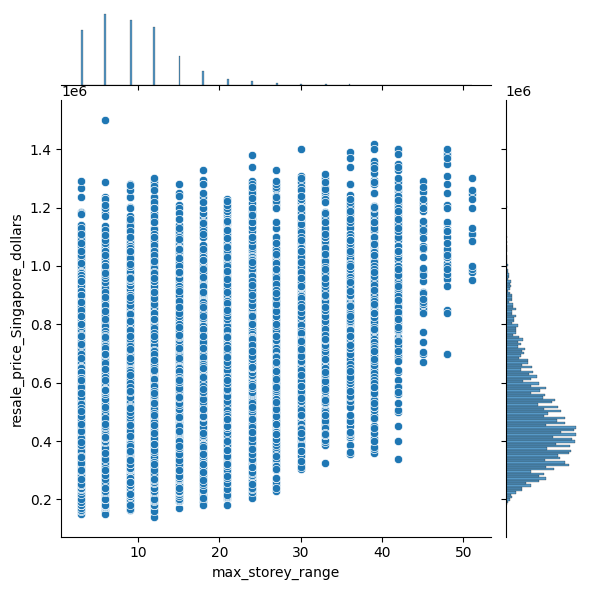

In [3]:
sns.jointplot(x="max_storey_range", y="resale_price_Singapore_dollars", data=resale_flat_prices_df)

As you can see, the data for the storeys are distributed vertically for each storey. We need to find a match with the model to fit the max_storey_range data, so that we can get the approximate resale price for each storey number.

Let's create a training and testing dataset.

In [4]:
X = resale_flat_prices_df[["max_storey_range"]]
y = resale_flat_prices_df[["resale_price_Singapore_dollars"]]

In [5]:
# Get the datasets from the dataframe
X_dataset = np.array(X).astype("float32")
y_dataset = np.array(y).astype("float32")

In [6]:
# Split the training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Normally set the test data size from 20-30%
# Create a regression model
regression_model = LinearRegression(fit_intercept=True) # Set to true, to avoid biasness in the data, since the storey numbers are distributed vertically

In [7]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# y = mX + c
print("Score: ", regression_model.score(X_test, y_test))
print("Linear Model Coefficient (m): ", regression_model.coef_)
print("Linear Model Coefficient (c): ", regression_model.intercept_)

Score:  0.129936348880606
Linear Model Coefficient (m):  [[10254.9667408]]
Linear Model Coefficient (c):  [383666.87323284]


Let's test the regression model.

In [9]:
y_predict = regression_model.predict(X_test)

In [10]:
y_predict

array([[445196.67367762],
       [568256.27456719],
       [506726.4741224 ],
       ...,
       [445196.67367762],
       [537491.3743448 ],
       [506726.4741224 ]])

Now we need to see how well our model works so far with training and test data

Text(0.5, 1.0, 'Resale Price vs. Storey No. (Training)')

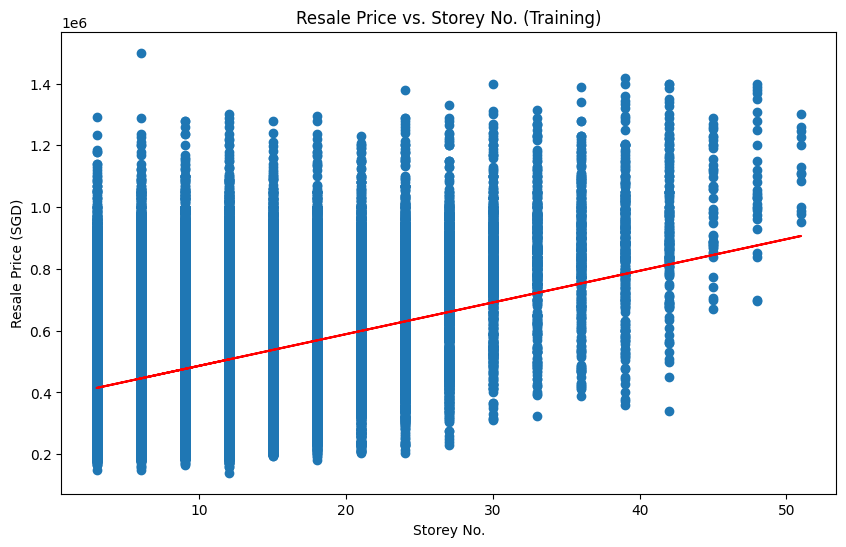

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, regression_model.predict(X_train), color="red")
plt.ylabel("Resale Price (SGD)")
plt.xlabel("Storey No.")
plt.title("Resale Price vs. Storey No. (Training)")

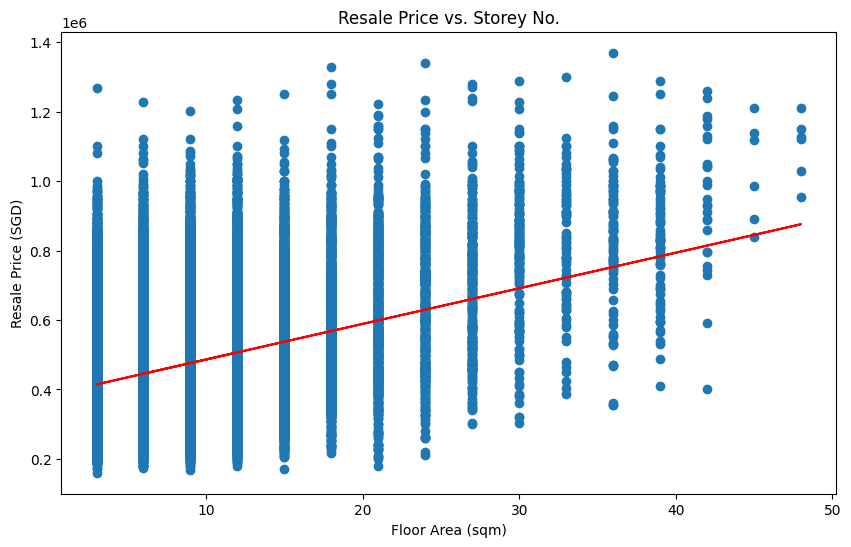

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, regression_model.predict(X_test), color="red")
plt.ylabel("Resale Price (SGD)")
plt.xlabel("Floor Area (sqm)")
plt.title("Resale Price vs. Storey No.")
plt.savefig("./result/resale_price_vs_storey_num.jpg")

In [13]:
# Input the floor area to see the resale price of the flat
storey_num = int(input("Enter a storey number: "))
resale_price = regression_model.predict(pd.DataFrame([[storey_num]], columns=["max_storey_range"])) if storey_num > 0 else [[0]]
# If the storey number is lesser than 1, there will be no resale price
print(f"The resale price for the flat in SGD will be: ${resale_price[0][0]:.2f}")

The resale price for the flat in SGD will be: $393921.84
